In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

test_data = pd.read_csv('/content/drive/MyDrive/go IT files/ab_test_data.csv')
test_data.head()



,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     19998 non-null  object
 1   timestamp   19998 non-null  object
 2   test_group  19998 non-null  object
 3   conversion  19998 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


In [ ]:
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     19998 non-null  object        
 1   timestamp   19998 non-null  datetime64[ns]
 2   test_group  19998 non-null  object        
 3   conversion  19998 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 625.1+ KB


# **Find the number of users and conversion and determine the conversion rate in each group**



In [ ]:
conversions = test_data.groupby(['test_group'], as_index=False).agg({ 'conversion': 'sum', 'user_id': 'count'})
conversions['conversion_rate'] = (conversions['conversion'] / conversions['user_id'])
conversions.head()

,test_group,conversion,user_id,conversion_rate
0,a,611,10013,0.061021
1,b,889,9985,0.089034


# **Find the start date and end date of the test and the test duration**

---



In [ ]:
start = test_data['timestamp'].min()
end = test_data['timestamp'].max()
date_start = start.date()
date_end = end.date()
print(f"Start - {date_start}")
print(f"End - {date_end}")

Start - 2023-07-03
End - 2023-07-25


In [ ]:
from datetime import timedelta
duration = (date_end - date_start) + timedelta(days=1) # Add 1 day because of subtracting principe - when subtracting the start date from the end date, the start date is not included in the result
print(f"Test duration - {duration}")

Test duration - 23 days, 0:00:00


# **Analysis of results using Student's t-test**

In [ ]:
a = test_data[test_data['test_group'] == 'a']['conversion']  #separaing CR for each group
b = test_data[test_data['test_group'] == 'b']['conversion']

In [ ]:
from scipy import stats

alpha = 0.05

statistic, pvalue = stats.ttest_ind(test_data[test_data['test_group'] == 'a']['conversion'],     #Perform Student's t-test
                                    test_data[test_data['test_group'] == 'b']['conversion'],
                                    alternative='less')

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.')

t-statistic: -7.53, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected.


# **Build a CR chart with a 95% confidence interval**

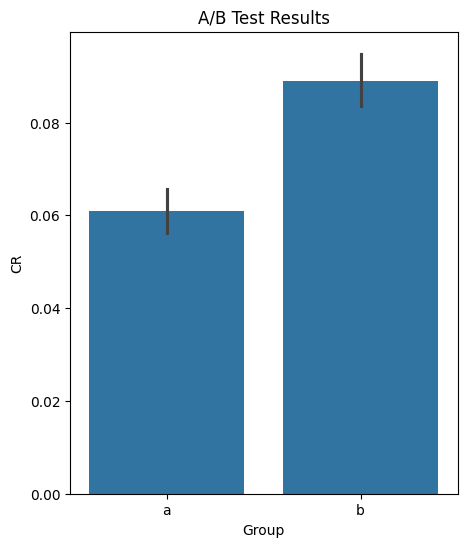

In [ ]:
plt.figure(figsize=(5, 6))
sns.barplot(x=test_data['test_group'],
            y=test_data['conversion'],
            errorbar=('ci', 95)) # Confidence Intervals

plt.title('A/B Test Results')
plt.xlabel('Group')
plt.ylabel('CR')

plt.show()

# **Display the change in conversion over time**

In [ ]:
# Aggregate data by date
conversion_a = test_data[test_data['test_group'] == 'a'].groupby('date')['conversion'].mean().reset_index()
conversion_b = test_data[test_data['test_group'] == 'b'].groupby('date')['conversion'].mean().reset_index()

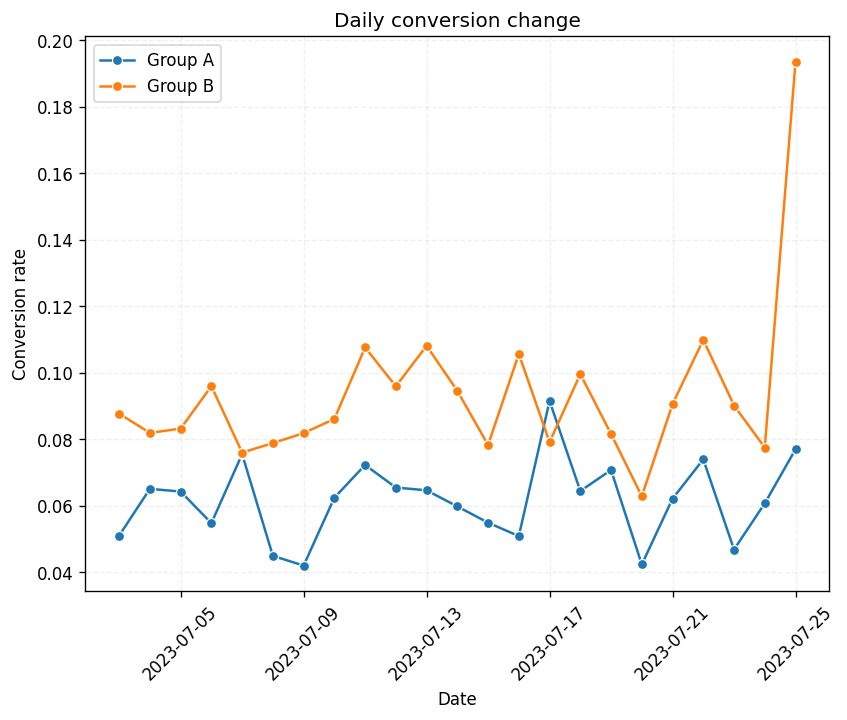

In [ ]:
# Build a chart with CR by groups and a summary for each day
plt.figure(figsize=(8, 6), dpi = 120)
sns.lineplot(x='date', y='conversion', data=conversion_a, label='Group A', marker='o')
sns.lineplot(x='date', y='conversion', data=conversion_b, label='Group B', marker='o')

plt.title('Daily conversion change')
plt.xlabel('Date')
plt.ylabel('Conversion rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.grid(axis='x', linestyle='--', alpha=0.2)
plt.show()